Importing the dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as signal
import csv
#from google.colab import drive
#drive.mount('/content/drive')

Reading the files

In [3]:
file_path = '/content/drive/MyDrive/Dataset/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv'
df = pd.read_csv(file_path)

/tmp/ipython-input-2192014801.py:2: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


This gives a Dtype warning. Therefore we inspect the data types of the columns.

In [4]:
def inspect_mixed_types(df, columns_to_check):
    for col_idx in columns_to_check:
        col_name = df.columns[col_idx]

        types = df.iloc[:, col_idx].apply(type).unique()

        print(f"--- Column {col_idx} ({col_name}) ---")
        print(f"Found types: {types}")


        if len(types) > 1:
            for t in types:
                example_val = df[df.iloc[:, col_idx].apply(isinstance, args=(t,))].iloc[0, col_idx]
                print(f"  Example of {t}: '{example_val}'")
        print("\n")

In [5]:
inspect_mixed_types(df, [0, 1, 2, 3])

--- Column 0 (Unnamed: 0) ---
Found types: [<class 'float'> <class 'str'> <class 'int'>]
  Example of <class 'float'>: 'nan'
  Example of <class 'str'>: 'Period'
  Example of <class 'int'>: '1'


--- Column 1 (Unnamed: 1) ---
Found types: [<class 'float'> <class 'str'> <class 'int'>]
  Example of <class 'float'>: 'nan'
  Example of <class 'str'>: 'Frame'
  Example of <class 'int'>: '16383'


--- Column 2 (Unnamed: 2) ---
Found types: [<class 'float'> <class 'str'>]
  Example of <class 'float'>: 'nan'
  Example of <class 'str'>: 'Time [s]'


--- Column 3 (Away) ---
Found types: [<class 'str'> <class 'float'>]
  Example of <class 'str'>: '25'
  Example of <class 'float'>: '0.90733'




We see that the columns have mixed datatypes. When we look closely at the csv file we observe that the first three rows contain column headers. So we find a way to extract the headers and the actual data separately.

In [6]:
def read_event_data(game_id):

    eventfile = '/content/drive/MyDrive/Dataset/Sample_Game_%d/Sample_Game_%d_RawEventsData.csv' % (game_id,game_id)
    events = pd.read_csv(eventfile)
    return events

def tracking_data(game_id,teamname):

    teamfile = '/content/drive/MyDrive/Dataset/Sample_Game_%d/Sample_Game_%d_RawTrackingData_%s_Team.csv' % (game_id,game_id,teamname)
    csvfile =  open(teamfile, 'r')
    reader = csv.reader(csvfile)
    teamnamefull = next(reader)[3].lower()
    print("Reading team: %s" % teamnamefull)

    jerseys = [x for x in next(reader) if x != '']
    columns = next(reader)
    for i, j in enumerate(jerseys):
        columns[i*2+3] = "{}_{}_x".format(teamname, j)
        columns[i*2+4] = "{}_{}_y".format(teamname, j)
    columns[-2] = "ball_x"
    columns[-1] = "ball_y"

    tracking = pd.read_csv(teamfile, names=columns, index_col='Frame', skiprows=3)
    return tracking

In [7]:
game_id = 1
tracking_away = tracking_data(game_id, 'Away')
tracking_home = tracking_data(game_id, 'Home')
events=read_event_data(game_id)

Reading team: away
Reading team: home


In [8]:
tracking_away.columns

Index(['Period', 'Time [s]', 'Away_25_x', 'Away_25_y', 'Away_15_x',
       'Away_15_y', 'Away_16_x', 'Away_16_y', 'Away_17_x', 'Away_17_y',
       'Away_18_x', 'Away_18_y', 'Away_19_x', 'Away_19_y', 'Away_20_x',
       'Away_20_y', 'Away_21_x', 'Away_21_y', 'Away_22_x', 'Away_22_y',
       'Away_23_x', 'Away_23_y', 'Away_24_x', 'Away_24_y', 'Away_26_x',
       'Away_26_y', 'Away_27_x', 'Away_27_y', 'Away_28_x', 'Away_28_y',
       'ball_x', 'ball_y'],
      dtype='object')

In [9]:
events.columns

Index(['Team', 'Type', 'Subtype', 'Period', 'Start Frame', 'Start Time [s]',
       'End Frame', 'End Time [s]', 'From', 'To', 'Start X', 'Start Y',
       'End X', 'End Y'],
      dtype='object')

In [10]:
tracking_home.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145006 entries, 1 to 145006
Data columns (total 32 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Period     145006 non-null  int64  
 1   Time [s]   145006 non-null  float64
 2   Home_11_x  145006 non-null  float64
 3   Home_11_y  145006 non-null  float64
 4   Home_1_x   46706 non-null   float64
 5   Home_1_y   46706 non-null   float64
 6   Home_2_x   145006 non-null  float64
 7   Home_2_y   145006 non-null  float64
 8   Home_3_x   145006 non-null  float64
 9   Home_3_y   145006 non-null  float64
 10  Home_4_x   145006 non-null  float64
 11  Home_4_y   145006 non-null  float64
 12  Home_5_x   145006 non-null  float64
 13  Home_5_y   145006 non-null  float64
 14  Home_6_x   110849 non-null  float64
 15  Home_6_y   110849 non-null  float64
 16  Home_7_x   145006 non-null  float64
 17  Home_7_y   145006 non-null  float64
 18  Home_8_x   145006 non-null  float64
 19  Home_8_y   145006 non-null  

In [11]:
tracking_away.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145006 entries, 1 to 145006
Data columns (total 32 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Period     145006 non-null  int64  
 1   Time [s]   145006 non-null  float64
 2   Away_25_x  145006 non-null  float64
 3   Away_25_y  145006 non-null  float64
 4   Away_15_x  145006 non-null  float64
 5   Away_15_y  145006 non-null  float64
 6   Away_16_x  145006 non-null  float64
 7   Away_16_y  145006 non-null  float64
 8   Away_17_x  145006 non-null  float64
 9   Away_17_y  145006 non-null  float64
 10  Away_18_x  145006 non-null  float64
 11  Away_18_y  145006 non-null  float64
 12  Away_19_x  119381 non-null  float64
 13  Away_19_y  119381 non-null  float64
 14  Away_20_x  145006 non-null  float64
 15  Away_20_y  145006 non-null  float64
 16  Away_21_x  145006 non-null  float64
 17  Away_21_y  145006 non-null  float64
 18  Away_22_x  106869 non-null  float64
 19  Away_22_y  106869 non-null  

Data Transformation

After half time the teams change sides. This will require us to process the data of both the halves separately. So I altered the data so that the game moves in a single direction.

In [12]:
def to_single_playing_direction(d):
    df=d.copy()
    columns_flip = [c for c in df.columns if c[-1:] in ['x', 'y']]
    df.loc[df['Period'] == 2, columns_flip] = 1 - df.loc[df['Period'] == 2, columns_flip]
    return df

In [13]:
tracking_home.loc[tracking_home['Period']==2]

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
71269,2,2850.76,1.01279,0.47303,NaN,NaN,0.68137,0.63160,0.03420,-0.05000,...,0.50347,0.64835,0.54555,0.67339,NaN,NaN,NaN,NaN,NaN,NaN
71270,2,2850.80,1.01279,0.47303,NaN,NaN,0.68137,0.63160,0.03420,-0.05000,...,0.50347,0.64835,0.54555,0.67339,NaN,NaN,NaN,NaN,NaN,NaN
71271,2,2850.84,1.01279,0.47303,NaN,NaN,0.68137,0.63160,0.03420,-0.05000,...,0.50347,0.64835,0.54555,0.67339,NaN,NaN,NaN,NaN,NaN,NaN
71272,2,2850.88,1.01277,0.47303,NaN,NaN,0.68151,0.63251,0.03310,-0.05000,...,0.50367,0.64918,0.54539,0.67343,NaN,NaN,NaN,NaN,NaN,NaN
71273,2,2850.92,1.01262,0.47303,NaN,NaN,0.68173,0.63286,0.03197,-0.05000,...,0.50380,0.64974,0.54538,0.67362,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,5800.08,0.90614,0.45355,NaN,NaN,0.34157,0.64598,0.31228,0.67513,...,NaN,NaN,0.30044,0.68311,0.33644,0.65390,0.34157,0.64598,NaN,NaN
145003,2,5800.12,0.90550,0.45355,NaN,NaN,0.34127,0.64583,0.31230,0.67529,...,NaN,NaN,0.30044,0.68311,0.33656,0.65398,0.34127,0.64583,NaN,NaN
145004,2,5800.16,0.90492,0.45355,NaN,NaN,0.34089,0.64569,0.31214,0.67501,...,NaN,NaN,0.30044,0.68311,0.33637,0.65366,0.34089,0.64569,NaN,NaN


In [14]:
tracking_home=to_single_playing_direction(tracking_home)
tracking_away=to_single_playing_direction(tracking_away)

In [15]:
tracking_home.loc[tracking_home['Period']==2]

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
71269,2,2850.76,-0.01279,0.52697,NaN,NaN,0.31863,0.36840,0.96580,1.05000,...,0.49653,0.35165,0.45445,0.32661,NaN,NaN,NaN,NaN,NaN,NaN
71270,2,2850.80,-0.01279,0.52697,NaN,NaN,0.31863,0.36840,0.96580,1.05000,...,0.49653,0.35165,0.45445,0.32661,NaN,NaN,NaN,NaN,NaN,NaN
71271,2,2850.84,-0.01279,0.52697,NaN,NaN,0.31863,0.36840,0.96580,1.05000,...,0.49653,0.35165,0.45445,0.32661,NaN,NaN,NaN,NaN,NaN,NaN
71272,2,2850.88,-0.01277,0.52697,NaN,NaN,0.31849,0.36749,0.96690,1.05000,...,0.49633,0.35082,0.45461,0.32657,NaN,NaN,NaN,NaN,NaN,NaN
71273,2,2850.92,-0.01262,0.52697,NaN,NaN,0.31827,0.36714,0.96803,1.05000,...,0.49620,0.35026,0.45462,0.32638,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,5800.08,0.09386,0.54645,NaN,NaN,0.65843,0.35402,0.68772,0.32487,...,NaN,NaN,0.69956,0.31689,0.66356,0.34610,0.65843,0.35402,NaN,NaN
145003,2,5800.12,0.09450,0.54645,NaN,NaN,0.65873,0.35417,0.68770,0.32471,...,NaN,NaN,0.69956,0.31689,0.66344,0.34602,0.65873,0.35417,NaN,NaN
145004,2,5800.16,0.09508,0.54645,NaN,NaN,0.65911,0.35431,0.68786,0.32499,...,NaN,NaN,0.69956,0.31689,0.66363,0.34634,0.65911,0.35431,NaN,NaN


We scale the normalized coordinates of the players and ball to the actual dimensions of the pitch.

In [16]:
field_dimen=(105.0,68.0)

x_columns = [c for c in tracking_home.columns if c[-1].lower()=='x']
y_columns = [c for c in tracking_home.columns if c[-1].lower()=='y']
tracking_home[x_columns] = ( tracking_home[x_columns]-0.5 ) * field_dimen[0]
tracking_home[y_columns] = -1 * ( tracking_home[y_columns]-0.5 ) * field_dimen[1]

x_columns = [c for c in tracking_away.columns if c[-1].lower()=='x']
y_columns = [c for c in tracking_away.columns if c[-1].lower()=='y']
tracking_away[x_columns] = ( tracking_away[x_columns]-0.5 ) * field_dimen[0]
tracking_away[y_columns] = -1 * ( tracking_away[y_columns]-0.5 ) * field_dimen[1]

In [17]:
tracking_home.head(5)

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-52.41390,1.19816,-18.21960,-10.41896,-17.11395,0.77316,-20.02665,9.84028,...,5.50515,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,-4.75440,7.67788
2,1,0.08,-52.39920,1.19816,-18.21960,-10.41896,-17.11395,0.77316,-20.02665,9.84028,...,5.50515,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,-0.37275,6.35392
3,1,0.12,-52.38030,1.19816,-18.21960,-10.41896,-17.11395,0.77316,-20.02665,9.84028,...,5.50515,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,3.90180,5.06192
4,1,0.16,-52.37295,1.19816,-18.24690,-10.41556,-17.12865,0.68816,-20.00880,9.82328,...,5.49780,4.54716,NaN,NaN,NaN,NaN,NaN,NaN,5.61330,5.28292
5,1,0.20,-52.36455,1.19816,-18.27315,-10.38292,-17.15280,0.66776,-20.00460,9.84096,...,5.46210,4.54852,NaN,NaN,NaN,NaN,NaN,NaN,5.78760,6.41240


Find the total number of goals scored by each team to know which team won. Also record the time at which each goal was scored.

In [18]:
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

# Get the rows at which a shot was made
home_shots = home_events[home_events.Type=='SHOT']
away_shots = away_events[away_events.Type=='SHOT']

# Get the shots that led to a goal
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')].copy()
print("Goals scored by home team",home_goals.shape[0])
print("Goals scored by away team",away_goals.shape[0])

# Add a column event 'Minute' to the data frame
home_goals['Minute'] = home_goals['Start Time [s]']/60.
print(home_goals)

Goals scored by home team 3
Goals scored by away team 0
      Team  Type              Subtype  Period  Start Frame  Start Time [s]  \
34    Home  SHOT  HEAD-ON TARGET-GOAL       1         2289           91.56   
1114  Home  SHOT       ON TARGET-GOAL       2        90005         3600.20   
1213  Home  SHOT       ON TARGET-GOAL       2        99032         3961.28   

      End Frame  End Time [s]      From   To  Start X  Start Y  End X  End Y  \
34         2309         92.36   Player9  NaN     0.92     0.47   1.01   0.55   
1114      90026       3601.04  Player10  NaN     0.08     0.31   0.00   0.54   
1213      99046       3961.84   Player9  NaN     0.02     0.54  -0.01   0.51   

         Minute  
34     1.526000  
1114  60.003333  
1213  66.021333  


Function to calculate the velocity and speed of each player of both the teams.

In [19]:
def calc_player_velocities(team, smoothing=True, filter_='Savitzky-Golay', window=7, polyorder=1, maxspeed = 12):

    # remove any velocity data already in the dataframe
    team = remove_player_velocities(team)

    # Get player ids
    player_ids = np.unique( [ c[:-2] for c in team.columns if c[:4] in ['Home','Away'] ] )

    # Calculate the timestep from one frame to the next.
    dt = team['Time [s]'].diff() #Should always be 0.04 within the same half

    # index of first frame in second half
    second_half_idx = team[team['Period'] == 2].index[0]

    # calculate player velocities
    for player in player_ids:
        # difference in player positions in dt
        vx = team[player+"_x"].diff() / dt
        vy = team[player+"_y"].diff() / dt

        if maxspeed>0:
            # remove data points that exceed the maximum speed (these are position errors)
            raw_speed = np.sqrt( vx**2 + vy**2 )
            vx[ raw_speed>maxspeed ] = np.nan
            vy[ raw_speed>maxspeed ] = np.nan

        # Smoothing removes data "noise" and frame-by-frame jitters that would otherwise inflate running stats.
        if smoothing:
            if filter_=='Savitzky-Golay':
                # calculate first half velocity
                vx.loc[:second_half_idx] = signal.savgol_filter(vx.loc[:second_half_idx],window_length=window,polyorder=polyorder)
                vy.loc[:second_half_idx] = signal.savgol_filter(vy.loc[:second_half_idx],window_length=window,polyorder=polyorder)
                # calculate second half velocity
                vx.loc[second_half_idx:] = signal.savgol_filter(vx.loc[second_half_idx:],window_length=window,polyorder=polyorder)
                vy.loc[second_half_idx:] = signal.savgol_filter(vy.loc[second_half_idx:],window_length=window,polyorder=polyorder)
            elif filter_=='moving average':
                ma_window = np.ones( window ) / window
                # calculate first half velocity
                vx.loc[:second_half_idx] = np.convolve( vx.loc[:second_half_idx] , ma_window, mode='same' )
                vy.loc[:second_half_idx] = np.convolve( vy.loc[:second_half_idx] , ma_window, mode='same' )
                # calculate second half velocity
                vx.loc[second_half_idx:] = np.convolve( vx.loc[second_half_idx:] , ma_window, mode='same' )
                vy.loc[second_half_idx:] = np.convolve( vy.loc[second_half_idx:] , ma_window, mode='same' )


        # put player speed in x,y direction, and total speed back in the data frame
        team[player + "_vx"] = vx
        team[player + "_vy"] = vy
        team[player + "_speed"] = np.sqrt( vx**2 + vy**2 )

    return team

def remove_player_velocities(team):
    # remove player velocoties and acceleeration measures that are already in the 'team' dataframe
    columns = [c for c in team.columns if c.split('_')[-1] in ['vx','vy','ax','ay','speed','acceleration']] # Get the player ids
    team = team.drop(columns=columns)
    return team

In [20]:
tracking_home = calc_player_velocities(tracking_home,smoothing=True)

In [21]:
tracking_away = calc_player_velocities(tracking_away,smoothing=True)

In [22]:
tracking_home.head(5)

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-52.41390,1.19816,-18.21960,-10.41896,-17.11395,0.77316,-20.02665,9.84028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,-52.39920,1.19816,-18.21960,-10.41896,-17.11395,0.77316,-20.02665,9.84028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,-52.38030,1.19816,-18.21960,-10.41896,-17.11395,0.77316,-20.02665,9.84028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,-52.37295,1.19816,-18.24690,-10.41556,-17.12865,0.68816,-20.00880,9.82328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,-52.36455,1.19816,-18.27315,-10.38292,-17.15280,0.66776,-20.00460,9.84096,...,0.810428,0.585,1.369714,1.48941,-0.04875,1.806857,1.807515,0.20625,1.296857,1.313156


Function to evaluate stamina of the players. I have used 4 metrics:
1.Total Distance travelled(Volume of work)
2.High Speed Running Distance
3.Average Speed analysed over 15min segments(Fatigue Profile or Intensity of Work)
4.Repeat Sprint Ability(Recovery time required between sprints)

In [25]:
def player_stamina(team,side):

  # Extract player IDs in each team
  home_players = np.unique( [ c.split('_')[1] for c in team.columns if c[:4] == side ] )
  home_summary = pd.DataFrame(index=home_players)


  # Total distance travelled (Metric 1)
  distance_1st_half = []
  distance_2nd_half = []
  for player in home_summary.index:
    column = side + '_' + player + '_speed'

    # Total distance travelled in 1st half
    dist_1h = team.loc[team['Period'] == 1, column].sum() / 25. / 1000.
    distance_1st_half.append(dist_1h)

    # Total distance travelled in 2nd half
    dist_2h = team.loc[team['Period'] == 2, column].sum() / 25. / 1000.
    distance_2nd_half.append(dist_2h)

  home_summary['Dist 1st Half [km]'] = distance_1st_half
  home_summary['Dist 2nd Half [km]'] = distance_2nd_half


  # Plotting total distance travelled
  ax = home_summary[['Dist 1st Half [km]', 'Dist 2nd Half [km]']].plot(kind='bar', figsize=(12,6), color=['#1f77b4', '#ff7f0e'])
  ax.set_title("Total Distance Covered: 1st vs 2nd Half", fontsize=16)
  ax.set_ylabel("Distance (km)")
  ax.set_xlabel("Player ID")
  plt.xticks(rotation=0)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.legend(title="Period")
  plt.tight_layout()
  plt.show()


  # Calculate High Speed Running Distance(HSR dist.) (Metric 2)
  sprinting_1st_half = []
  sprinting_2nd_half = []

  for player in home_summary.index:
    column = side + '_' + player + '_speed'

    # Sprinting 1st Half: Speed >= 7 m/s AND Period == 1
    dist_1h = team.loc[(team[column] >= 7) & (team['Period'] == 1), column].sum() / 25. / 1000.
    sprinting_1st_half.append(dist_1h)

    # Sprinting 2nd Half: Speed >= 7 m/s AND Period == 2
    dist_2h = team.loc[(team[column] >= 7) & (team['Period'] == 2), column].sum() / 25. / 1000.
    sprinting_2nd_half.append(dist_2h)


  home_summary['Sprinting 1st Half [km]'] = sprinting_1st_half
  home_summary['Sprinting 2nd Half [km]'] = sprinting_2nd_half


  # Plotting Sprinting (HSR) Distance
  ax = home_summary[['Sprinting 1st Half [km]', 'Sprinting 2nd Half [km]']].plot(kind='bar', figsize=(12,6), color=['#2ca02c', '#d62728'])
  ax.set_title("Sprinting Distance (>7 m/s): 1st vs 2nd Half", fontsize=16)
  ax.set_ylabel("Sprint Distance (km)")
  ax.set_xlabel("Player ID")
  plt.xticks(rotation=0)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.legend(title="Period")
  plt.tight_layout()
  plt.show()


  # Calculate the Avg. Speed per 15min segment

  # Define the bins
  bins = range(0, 5401, 900)
  labels = ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90']
  team['Minute_Bin'] = pd.cut(team['Time [s]'], bins=bins, labels=labels)


  all_players_m_min = {}

  for player in home_summary.index:
    column = f'{side}_{player}_speed'
    player_profile = []

    for bin_label in labels:
        bin_data = team[team['Minute_Bin'] == bin_label]

        # Check if player column exists and has data for this bin
        if not bin_data.empty and column in bin_data.columns:
            dist_m = bin_data[column].sum() / 25.0 # Distance = sum of (speed * 0.04s)
            player_profile.append(round(dist_m / 15.0, 2))
        else:
            player_profile.append(0)

    all_players_m_min[player] = player_profile

  m_min_df = pd.DataFrame.from_dict(all_players_m_min, orient='index', columns=labels)

  # Plotting Avg. Speed per 15min segment
  plt.figure(figsize=(14, 8))
  # We use a color map that goes from Red (low) to Green (high)
  sns.heatmap(m_min_df, annot=True, cmap='RdYlGn', fmt='.1f', cbar_kws={'label': 'm/min'})
  plt.title("Player Intensity (m/min) across 15-Minute Segments", fontsize=16)
  plt.xlabel("Match Period (Minutes)")
  plt.ylabel("Player ID")
  plt.tight_layout()
  plt.show()

Evaluation of the first three metrics of the players of both the teams and obtaining their plots

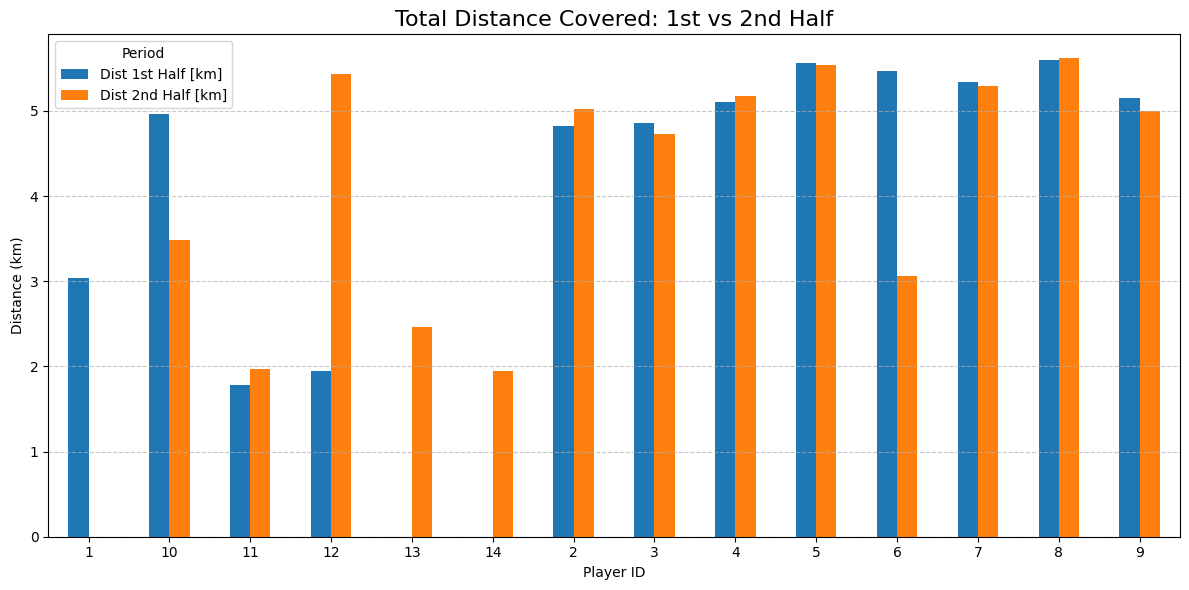

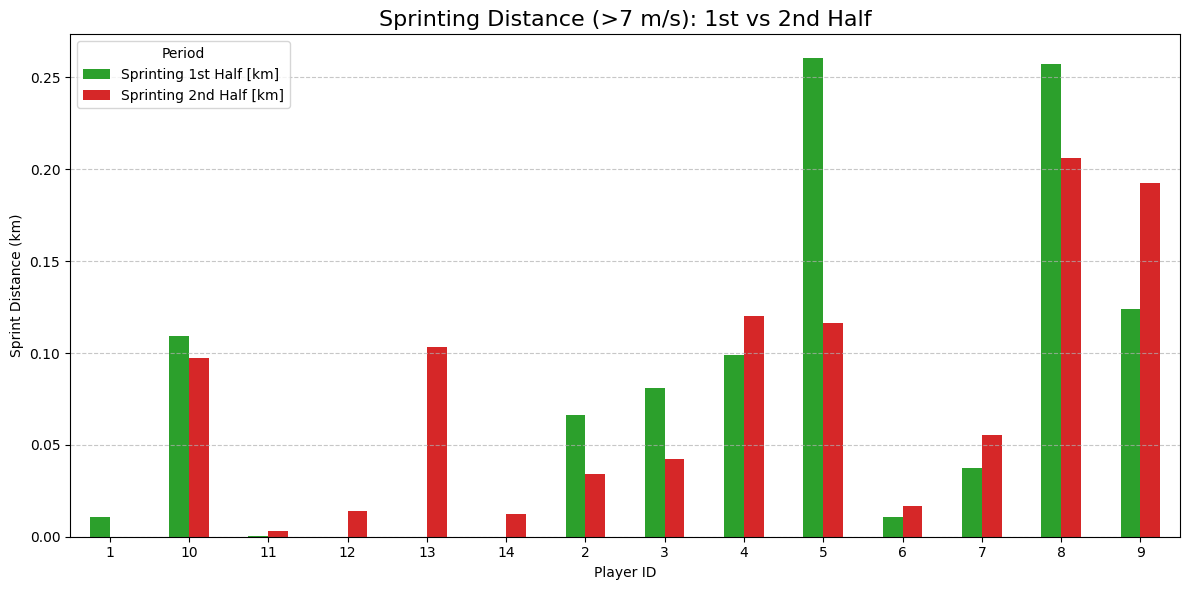

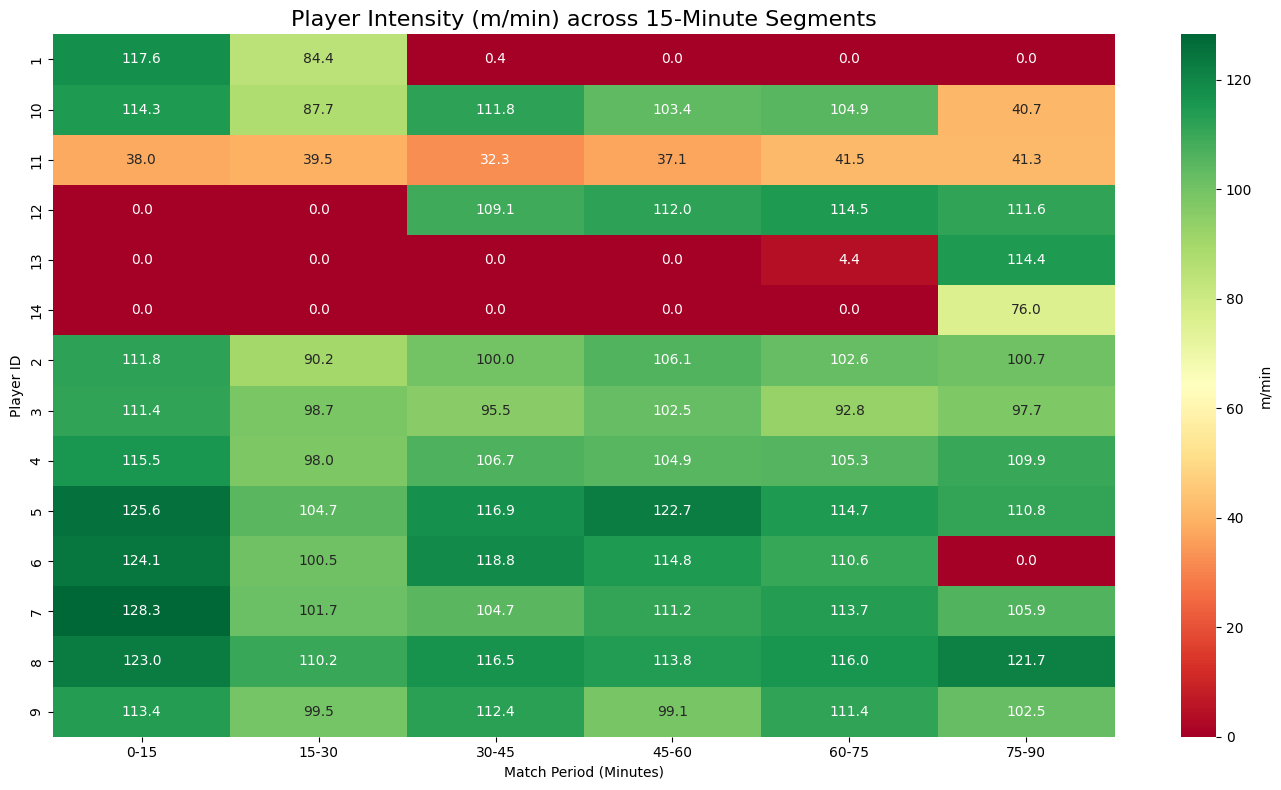

In [26]:
player_stamina(tracking_home,'Home')

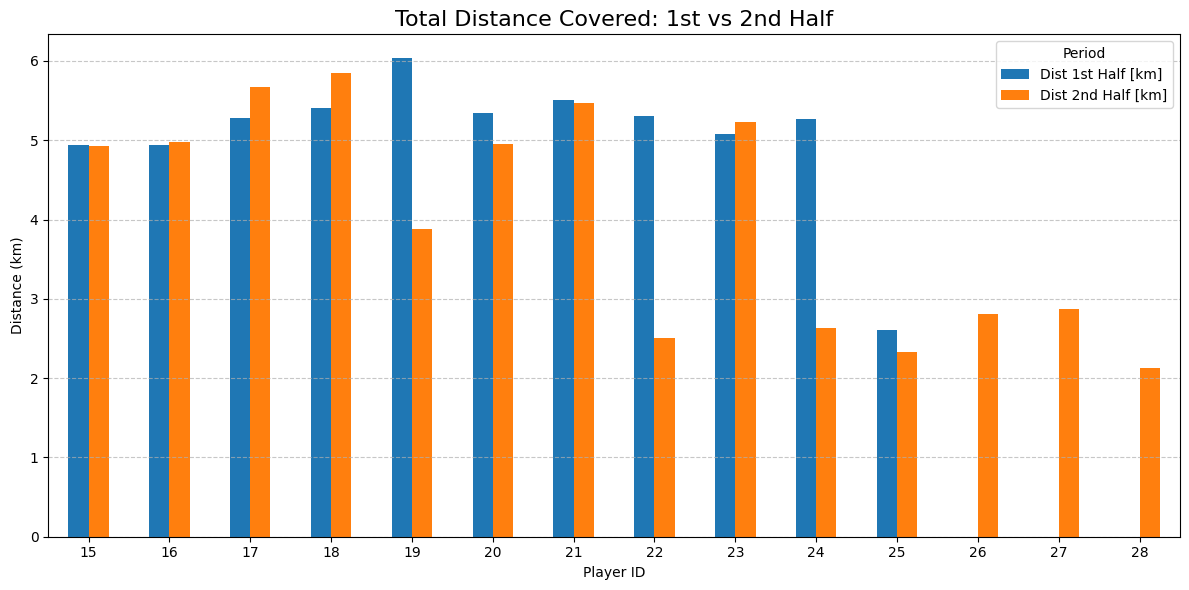

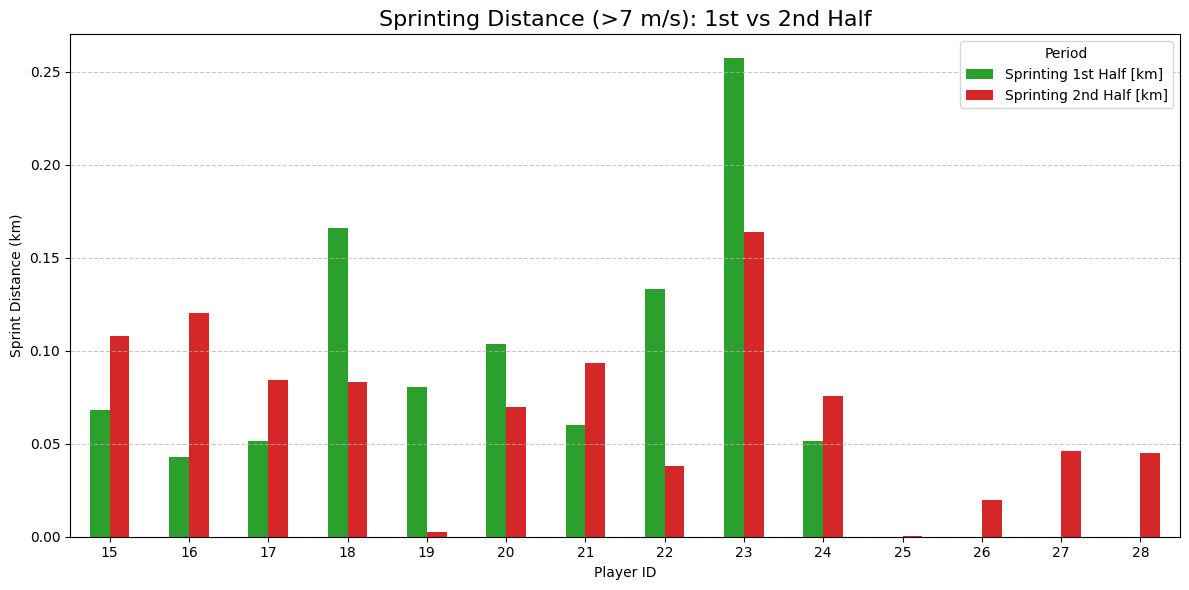

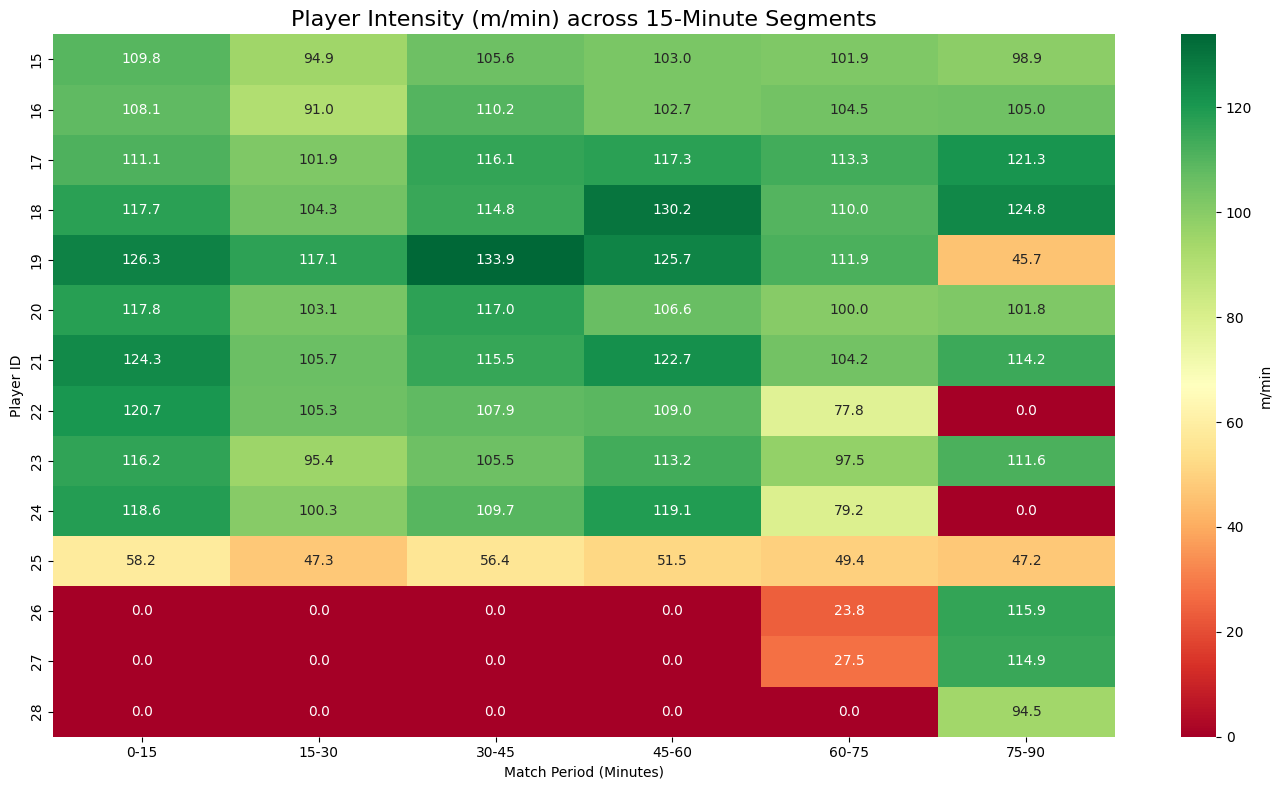

In [27]:
player_stamina(tracking_away,'Away')

Function to evaluating and plotting the 4th metric

In [29]:
def calculate_sprint_gaps(team,player,side):
  column = f'{side}_{player}_speed'
  is_sprinting = team[column] >= 7

  # Find transitions (Start and End of sprint events)
  sprint_start = is_sprinting & ~is_sprinting.shift(1).fillna(False)
  sprint_end = ~is_sprinting & is_sprinting.shift(1).fillna(False)

  # Get the timestamps for these events
  start_times = team.loc[sprint_start, 'Time [s]'].values
  end_times = team.loc[sprint_end, 'Time [s]'].values

  # Ensure we have an end for every start
  if len(start_times) > len(end_times):
      start_times = start_times[:len(end_times)]
  elif len(end_times) > len(start_times):
      end_times = end_times[1:] # Skip the first end if it happened before a recorded start

  # Calculate Gaps
  gaps = start_times[1:] - end_times[:-1]
  return gaps

/tmp/ipython-input-2051121646.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sprint_start = is_sprinting & ~is_sprinting.shift(1).fillna(False)
/tmp/ipython-input-2051121646.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sprint_end = ~is_sprinting & is_sprinting.shift(1).fillna(False)


length: 14


/tmp/ipython-input-285587066.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_gaps_data, labels=player_labels)


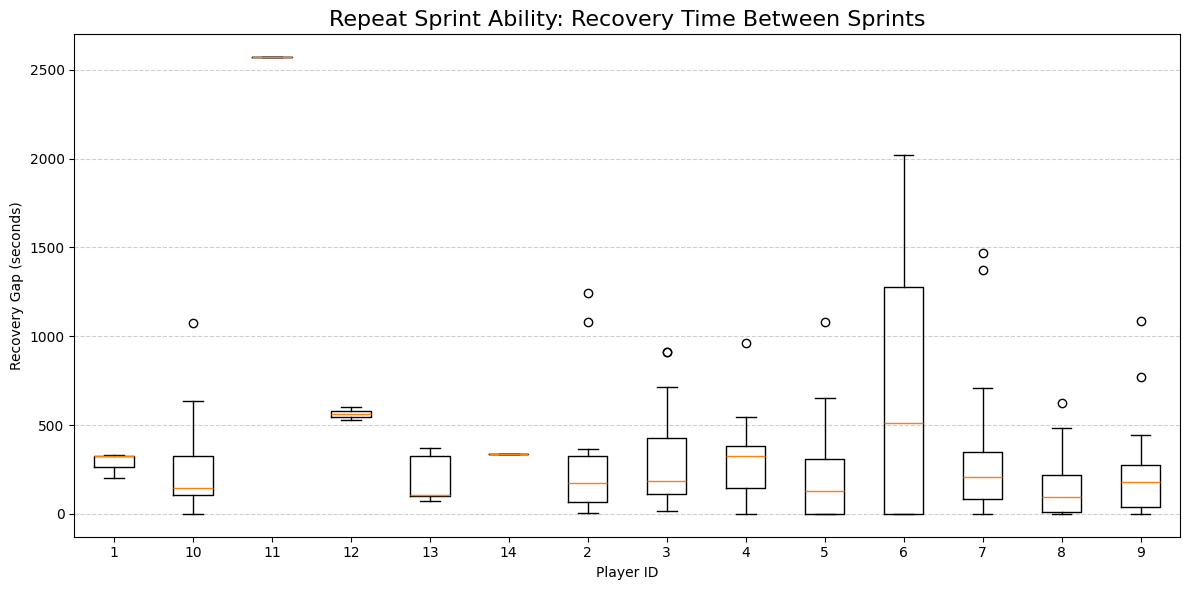

In [32]:
all_gaps_data = []
player_labels = []
home_players = np.unique( [ c.split('_')[1] for c in tracking_home.columns if c[:4] == 'Home' ] )
home_summary = pd.DataFrame(index=home_players)

for player in home_summary.index:
    gaps = calculate_sprint_gaps(tracking_home, player,'Home') # Using the function
    if len(gaps) > 0:
        all_gaps_data.append(gaps)
        player_labels.append(player)
print("length:",len(all_gaps_data))

# Plotting the Recovery Time distribution
plt.figure(figsize=(12, 6))
plt.boxplot(all_gaps_data, labels=player_labels)
plt.title("Repeat Sprint Ability: Recovery Time Between Sprints", fontsize=16)
plt.ylabel("Recovery Gap (seconds)")
plt.xlabel("Player ID")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2051121646.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sprint_start = is_sprinting & ~is_sprinting.shift(1).fillna(False)
/tmp/ipython-input-2051121646.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sprint_end = ~is_sprinting & is_sprinting.shift(1).fillna(False)


length: 13


/tmp/ipython-input-2269937515.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_gaps_data, labels=player_labels)


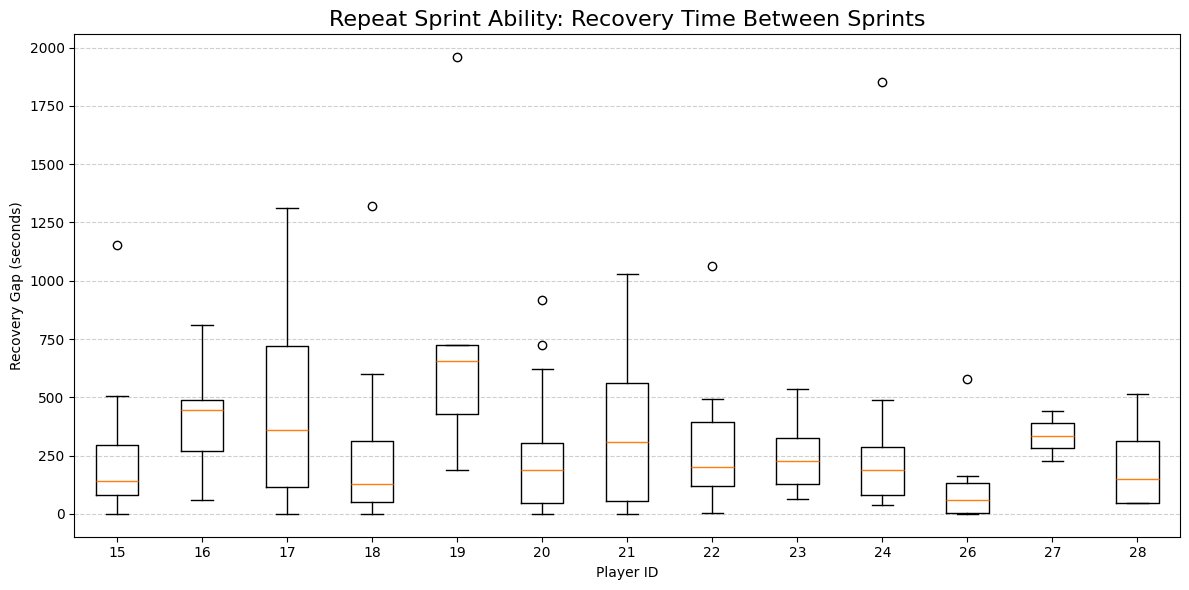

In [33]:
all_gaps_data = []
player_labels = []
home_players = np.unique( [ c.split('_')[1] for c in tracking_away.columns if c[:4] == 'Away' ] )
home_summary = pd.DataFrame(index=home_players)

for player in home_summary.index:
    gaps = calculate_sprint_gaps(tracking_away, player,'Away') # Using the function
    if len(gaps) > 0:
        all_gaps_data.append(gaps)
        player_labels.append(player)
print("length:",len(all_gaps_data))

# Plotting the Recovery Time distribution
plt.figure(figsize=(12, 6))
plt.boxplot(all_gaps_data, labels=player_labels)
plt.title("Repeat Sprint Ability: Recovery Time Between Sprints", fontsize=16)
plt.ylabel("Recovery Gap (seconds)")
plt.xlabel("Player ID")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()